In [20]:
import numpy as np
import pandas as pd
# load mat file
import scipy

In [21]:
mat = scipy.io.loadmat('../datasets/irmdata/uml.mat')
d = mat['Rs']
d.shape

(135, 135, 49)

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys

sys.path.append("/Users/aleix11alcacer/Projects/archetypes")

In [24]:
from models import NAA, NSBM
from models import BiAA, DBiAA
import torch

In [25]:
data = torch.tensor(d).float().reshape(d.shape)

model = NAA((16, 16, 21), d.shape, relations=[0, 0, 1], degree_correction=True,
             membership="soft", loss="bernoulli")

model.fit(data, n_epochs=2_000, learning_rate=0.05)

  0%|          | 0/2000 [00:00<?, ?it/s]

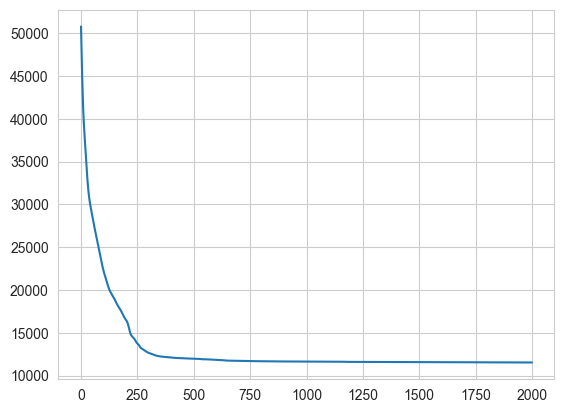

In [26]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.show()

In [27]:
from archetypes.visualization import heatmap
from archetypes.datasets import sort_by_archetype_similarity

In [28]:
alphas = [a.detach().numpy() for a in model.A]
estimated_archetypes = model.Z.detach().numpy()

_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

In [29]:
gnames = np.array([str(*g) for g in mat["gnames"][0]])[info_s["perms"][0]]
names = np.array([str(*n[0]) for n in mat["names"]])[info_s["perms"][0]]
labels = info_s["labels"][0]
scores = info_s["scores"][0]

df = pd.DataFrame({"gname": gnames, "name": names, "label": labels, "score": scores})

In [30]:
df_g = df.groupby("label")
for _, df_i in df_g:
    c = df_i.groupby("label").count()
    df_i_h = df_i.name[df_i.score > 0]
    # to latex
    print(f"{df_i_h.to_latex(index=False)}\\quad")



\begin{tabular}{l}
\toprule
name \\
\midrule
Pharmacologic_Substance \\
Element,_Ion,_or_Isotope \\
Antibiotic \\
Amino_Acid_Sequence \\
Group_Attribute \\
Inorganic_Chemical \\
Chemical_Viewed_Structurally \\
Nucleic_Acid,_Nucleoside,_or_Nucleotide \\
Organophosphorus_Compound \\
Amino_Acid,_Peptide,_or_Protein \\
Lipid \\
Carbohydrate \\
Organic_Chemical \\
Steroid \\
Eicosanoid \\
Professional_or_Occupational_Group \\
Biomedical_or_Dental_Material \\
Chemical_Viewed_Functionally \\
Nucleotide_Sequence \\
\bottomrule
\end{tabular}
\quad
\begin{tabular}{l}
\toprule
name \\
\midrule
Cell \\
Fully_Formed_Anatomical_Structure \\
Tissue \\
Embryonic_Structure \\
Body_Part,_Organ,_or_Organ_Component \\
Gene_or_Genome \\
Cell_Component \\
Health_Care_Related_Organization \\
Self-help_or_Relief_Organization \\
Professional_Society \\
Body_Location_or_Region \\
Body_System \\
Organization \\
Body_Space_or_Junction \\
Anatomical_Structure \\
\bottomrule
\end{tabular}
\quad
\begin{tabular}{l}
\

In [31]:
true_label = df.gname.astype("category").cat.codes
pred_label = df.label.astype("category").cat.codes

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(true_label, pred_label)

0.39747089760549764

In [32]:
relnames = np.array([str(*g[0]) for g in mat["relnames"]])[info_s["perms"][1]]
labels = info_s["labels"][1]
scores = info_s["scores"][1]
df = pd.DataFrame({"relname": relnames, "label": labels, "score": scores})


In [33]:
for _, df_i in df.groupby("label"):
    c = df_i.groupby("relname").count()
    # to latex
    df_i_h = df_i.relname
    # print to latex, withouth the index
    print(f"{df_i_h.to_latex(index=False)}\n\n")

\begin{tabular}{l}
\toprule
relname \\
\midrule
surrounds \\
connected_to \\
interconnects \\
adjacent_to \\
traverses \\
developmental_form_of \\
tributary_of \\
branch_of \\
derivative_of \\
contains \\
consists_of \\
conceptual_part_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
precedes \\
degree_of \\
co-occurs_with \\
occurs_in \\
complicates \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
issue_in \\
ingredient_of \\
exhibits \\
practices \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
causes \\
prevents \\
treats \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
interacts_with \\
performs \\
property_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
method_of \\
conceptually_related_to \\
evaluation_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
relname \\
\midrule
analyzes \\
assesses_effect_of \\
use

C:\Users\aalcacer\Miniconda3\envs\archetypes\lib\site-packages\archetypes\visualization\heatmap.py:113: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(
C:\Users\aalcacer\Miniconda3\envs\archetypes\lib\site-packages\archetypes\visualization\heatmap.py:132: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(


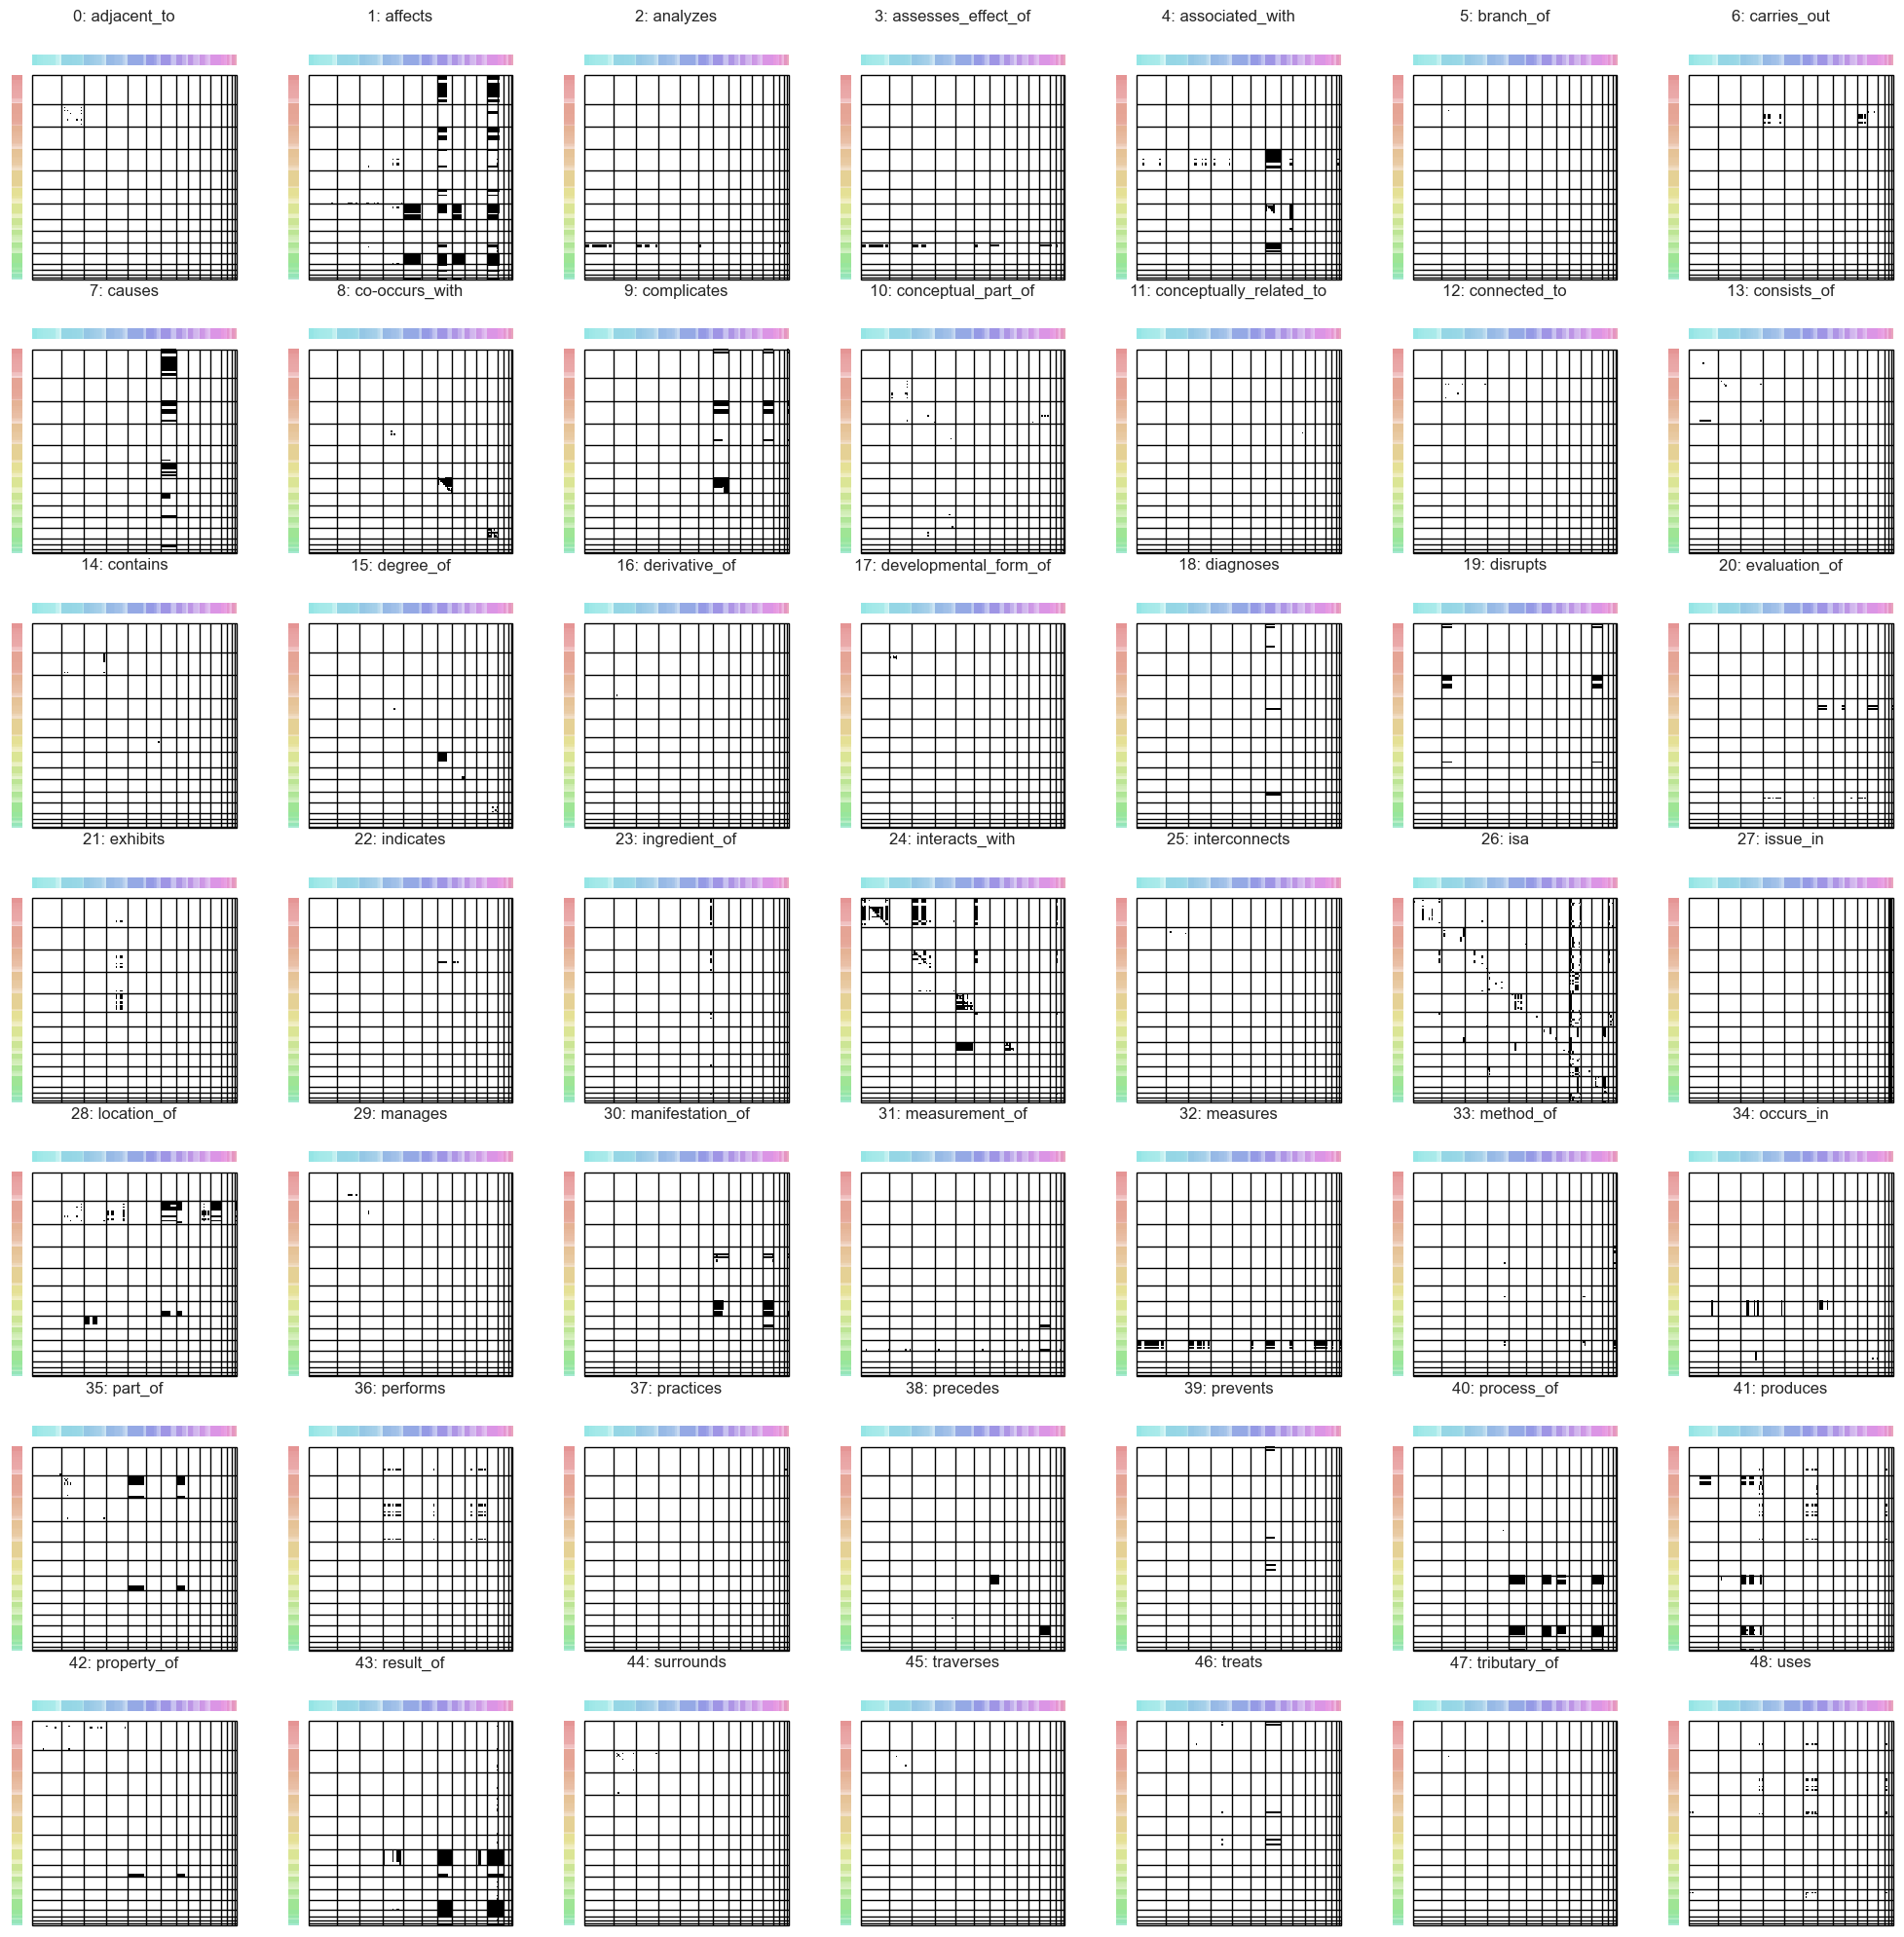

In [34]:
fig, axs = plt.subplots(7, 7, figsize=(25, 25))


for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, i], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{i}: {mat['relnames'][i][0][0]}")

# fig.savefig("figures/irmdata/alyawarra/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

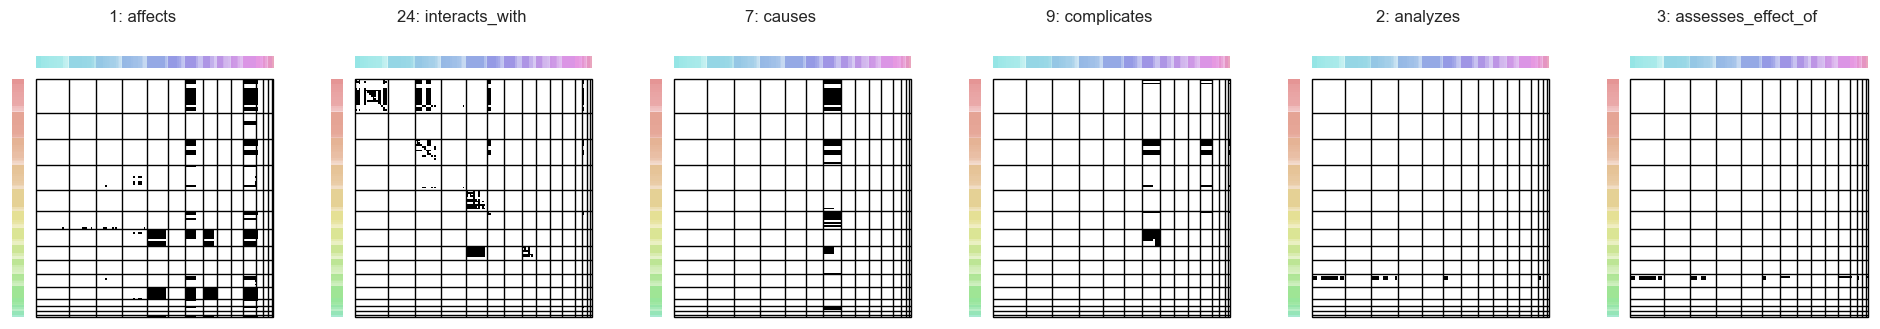

In [35]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rels = [1, 24, 7, 9, 2, 3]
for i, ax in enumerate(axs.flatten()):
    j = rels[i]
    data_s, info_s = sort_by_archetype_similarity(data[:, :, j], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{j}: {mat['relnames'][j][0][0]}")

# fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

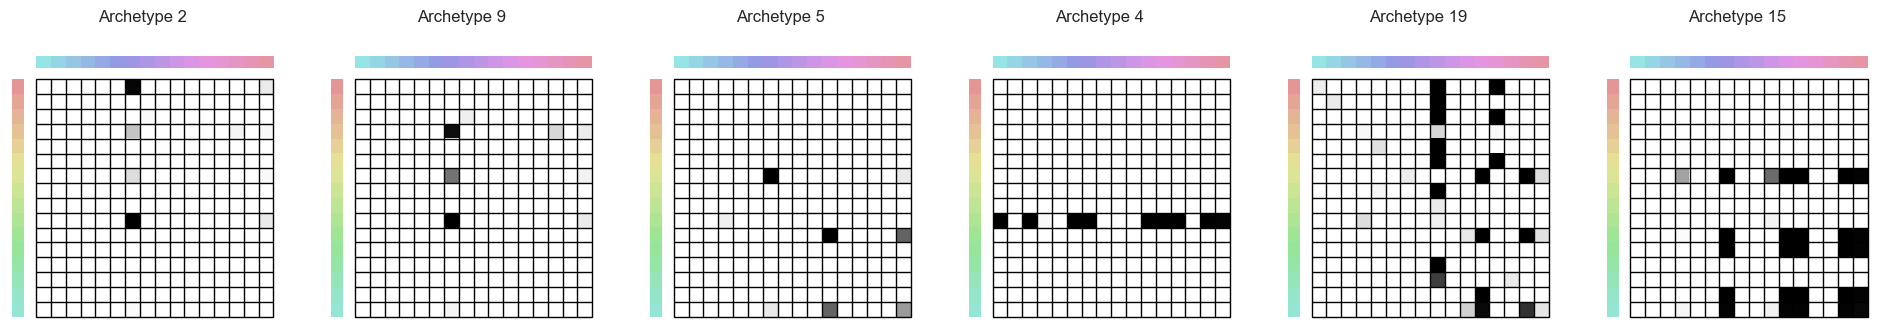

In [36]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rand_ind = np.random.choice(21, 6, replace=False)

for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, 0], alphas[:2], estimated_archetypes[:, :, rand_ind[i]])
    heatmap(info_s["archetypes"], labels=[np.arange(na) for na in info_s["n_archetypes"]], ax=ax)
    ax.set_title(f"Archetype {rand_ind[i]}")
# fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()